Importando bibliotecas.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from scipy.stats import kruskal
from scipy.stats import linregress
import scikit_posthocs as sp

-------

Carregando Dados


In [4]:
dataframe1 = pd.read_excel('registros-prod.xlsx')


-----

Visualizando DataFrame e suas informações


In [5]:
dataframe1

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


In [6]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [7]:
dataframe1.describe(include='all')

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
count,500.000000,500.000000,500,500.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,C,NaN
freq,NaN,NaN,177,NaN
mean,291.264600,2.098180,NaN,10.395002
std,45.182499,0.711166,NaN,1.572233
min,112.910000,0.050000,NaN,4.543124
25%,259.267500,1.630000,NaN,9.425819
50%,295.450000,2.300000,NaN,10.334273
75%,325.137500,2.672500,NaN,11.379932


In [8]:
dataframe1.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


----

Analise Descritiva

Aqui nesta seção iremos analisar caracteristicas descritivas dos dados, como: 

 - Média
 - Mediana
 - Desvio Padrão
 - Plotar Gráficos com Matplotlib e Seaborn
 - Correlações
 - Existencia de dados faltantes, dados errados e dados repetidos
 - Identificação de Outliers 
 - Usar testes estatisticos para pontuar possiveis correlações ou direcionamentos para a solução de negócio.

Analisando tipos de variaveis do df


* QTD_CHOC = numerica discreta  

* VAR1 = numerica continua

* VAR2 = Categorica Nominal

* PESO_BOMBOM = numerica continua


Observações 
* Não possuimos dados nulos, nem dados duplicados. 
* Observando os resultados obtidos pela função describle, não temos outliers.(Mas irei fazer mais algumas analise para concluir)
* Como são poucas variaveis, irei realizar alguns testes individuais mesclando as possibilidades para descobrir padrões.


---

--------

Analisando 'VAR_1'


Analise descritiva


Através destes gráficos conseguimos visualizar que relacionando a variável 'VAR_1' e 'PESO_BOMBOM'  conseguimos ver um grande foco conforme a 'VAR_1' aumenta.
É possível visualizar uma linha moderadamente crescente.


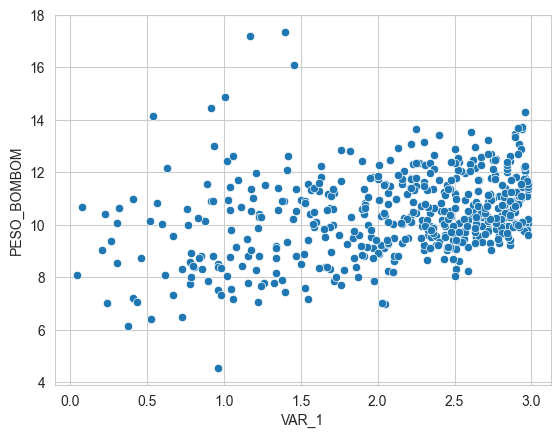

In [9]:
graf = sns.scatterplot(dataframe1, x= 'VAR_1', y='PESO_BOMBOM')
plt.show(graf)

Combinando 2 variaveis numericas em grafico de dispersão, adicionando os comandos kind = kde, conseguimos ver uma região de foco por camadas. 

Conforme 'PESO_BOMBOM'aumenta, o foco aumenta e a coloração mais forte.

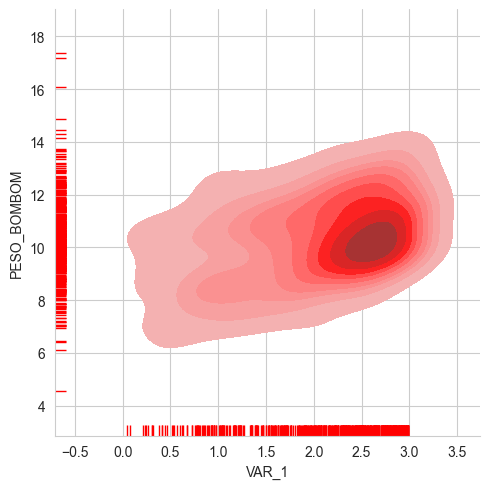

In [10]:
tapete_fig = sns.displot(dataframe1, x='VAR_1',y='PESO_BOMBOM',kind='kde',rug=True,fill=True,color='red')

Trabalhando em cima da variavel 'VAR_1'

Aplicando teste de regressão linear simples


In [11]:

X = dataframe1['VAR_1'].values
Y = dataframe1['PESO_BOMBOM'].values
coef_angular, coef_linear,_,_,desvio_erro= linregress(X,Y)

In [12]:
print('coeficiente angular = {:0.2f}'.format(coef_angular))


### coeficiente angular indica a inclinação da reta.

coeficiente angular = 0.70


In [13]:
print('coeficiente linear = {:0.2f}'.format(coef_linear))


### coeficiente linear indica onde a minha reta está cortando o eixo Y.

coeficiente linear = 8.93


In [14]:
print('desvio padrão = {:0.2f}'.format(desvio_erro))

desvio padrão = 0.09


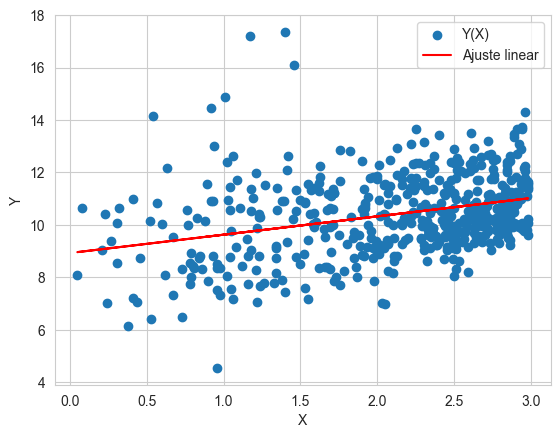

In [15]:
reta = coef_angular*X+coef_linear
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label= 'Ajuste linear', color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

Analise diagnostica






* O problema de negócio pode estar na ampla variação de opções a serem selecionadas no processo de produção. O Valor mínimo é 0.05 e o valor máximo é 2.98. Temos uma diferenciação muito grande, levando em consideração da média que mais se aproxima do peso ideal desejado (9.90 a 10).

* Temos uma correlação moderada entre as variáveis, no ponto em que ela se aproxima do valor de 1.3 a 1.5 fica ideal de acordo com a noma da indústria. 

* Gostaria de sugerir a opção de trabalhar em cima de uma formulação(processo que é pré-definido antes por múltiplos setores deixando demarcado qual a melhor combinação.)





METRICAS DE ERRO ABSOLUTO MEDIO E ERRO QUADRATICO MEDIO.


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


media_erro_absoluto = mean_absolute_error(Y,reta)
media_erro_quadratico = mean_squared_error(Y,reta)


print('Media de erro absoluto : {:0.2f}'.format(media_erro_absoluto))
print('Media erro quadratico : {:0.2f}'.format(media_erro_quadratico))









Media de erro absoluto : 1.17
Media erro quadratico : 2.22


Aplicando teste -  Coorelação de Pearson

In [17]:
sub2= dataframe1[['VAR_1', 'PESO_BOMBOM']].dropna()
sub2.corr()

,VAR_1,PESO_BOMBOM
VAR_1,1.000000,0.316657
PESO_BOMBOM,0.316657,1.000000


Numeros positivos - isso indica uma coorrelação.


Temos uma correlação(associação) com força moderada entre as variaveis, 


<Axes: >

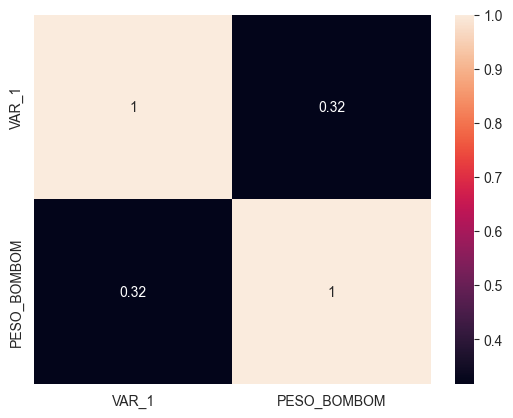

In [18]:
sns.heatmap(sub2.corr(), annot=True)

--------

----

Analise descritiva


Combinando 'VAR_1'com 'QTD_CHOC'não tivemos uma relacao linear boa ! 

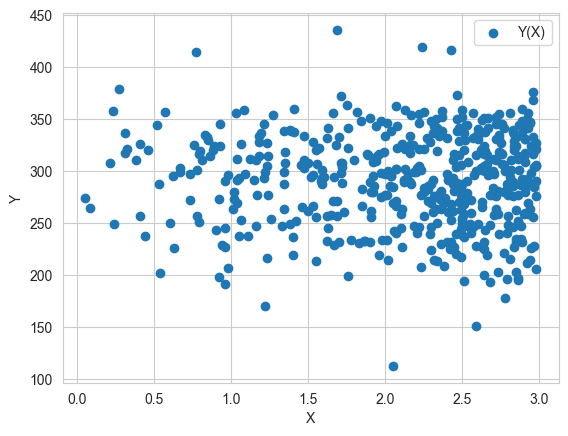

In [19]:
X = dataframe1['VAR_1'].values
Y = dataframe1['QTD_CHOC'].values
plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

Aplicando teste de regressão linear simples


In [20]:

X = dataframe1['VAR_1'].values
Y = dataframe1['QTD_CHOC'].values
coef_angular, coef_linear,_,_,desvio_erro= linregress(X,Y)

In [21]:
print('coeficiente angular = {:0.2f}'.format(coef_angular))

coeficiente angular = -1.85


In [22]:
print('coeficiente lienar = {:0.2f}'.format(coef_linear))

coeficiente lienar = 295.14


In [23]:
print('desvio padrão = {:0.2f}'.format(desvio_erro))

desvio padrão = 2.85


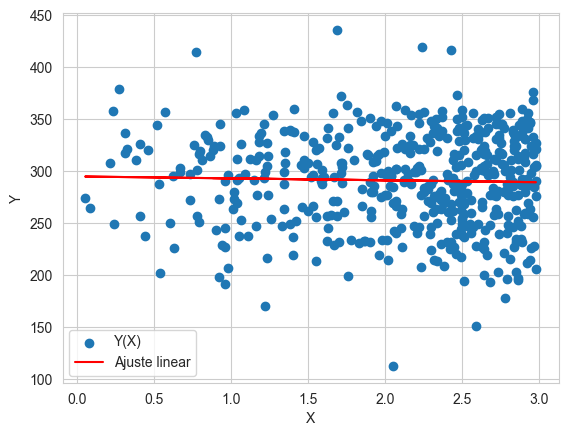

In [24]:
reta = coef_angular*X+coef_linear
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label= 'Ajuste linear', color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

Analise diagnostica


Analisando  de forma indivdual em cima da variavel 'VAR_1' e 'QTD_CHOC' 



* Combinando essas 2 variaveis não conseguimos visualizar de forma tão clara um ponto de vista estatistico.  

* Temos uma baixa correlação(associação) entre as variaveis, ao ponto em que uma sobe a outra diminui. 


* Esta combinação pode não ser uma das mais relevantes para acharmos a solução de negócio.


In [25]:
sub3= dataframe1[['VAR_1', 'QTD_CHOC']].dropna()
sub3.corr()

,VAR_1,QTD_CHOC
VAR_1,1.000000,-0.029062
QTD_CHOC,-0.029062,1.000000


numero negativo - isso indica uma coorrelação negativa fraca.


<Axes: >

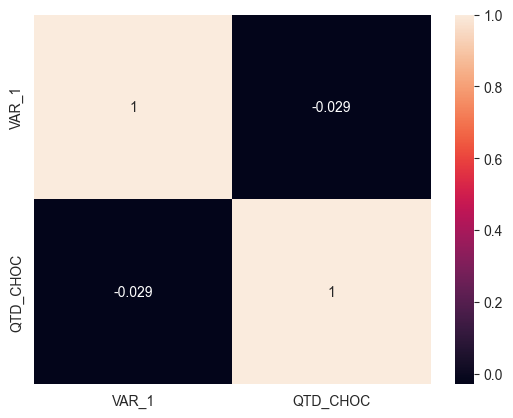

In [26]:
sns.heatmap(sub3.corr(), annot=True)

-----

----

Analisando 'VAR_1'comparando com  'VAR_2'

In [27]:
sub4 = dataframe1[['VAR_2','VAR_1']].dropna()

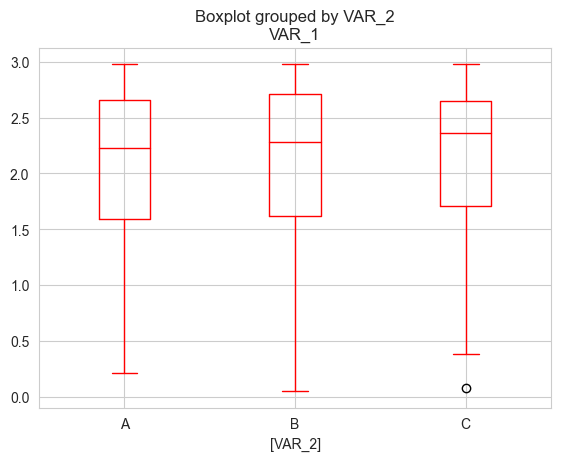

In [28]:
boxplot2 = sub4.boxplot(by='VAR_2',color='red')
plt.show(boxplot2)

Analise Descritiva 


Não é possivel visualizar diferenciação ente os atributos


------

Aplicando Teste de Kruskal Willis


In [29]:
o= dataframe1[dataframe1['VAR_2']=='A']['VAR_1']
l= dataframe1[dataframe1['VAR_2']=='B']['VAR_1']
t= dataframe1[dataframe1['VAR_2']=='C']['VAR_1']

In [30]:
kruskal(o,l,t)

KruskalResult(statistic=0.39044231826615716, pvalue=0.8226527007778743)

In [31]:
statistico, valorP = kruskal(o,l,t)

if valorP < 0.05:
    print('Rejeitando a hipótese nula - > há diferença estatisticamente significativa entre as variaveis')
else:
    print('Aceitando a hipótese nula - > Não há evidências suficientes para concluirmos que há diferença estatisticamente significativa entre as variaveis')

Aceitando a hipótese nula - > Não há evidências suficientes para concluirmos que há diferença estatisticamente significativa entre as variaveis


Analise diagnostica

Após a colocação de aceitarmos a hipotese nula, consequentemente não há diferença estatisticamente significativa entre as variaveis 'VAR_2' e 'VAR_1'.


* O que podemos tirar de aproveitamento e recomendação para o negócio, é que se a mediana se encontra a cima do valor de 1.5 ('VAR_1') em todos os cenários de combinação com  a 'VAR_2'. No futuro podemos trabalhar com a ideia de pré estimar faixas de 0.50 a 1.0 e assim por diante encurtando a margem de escolha para um melhor resultado.

----

--------

Analisando 'VAR_2'comparando com 'PESO_BOMBOM'

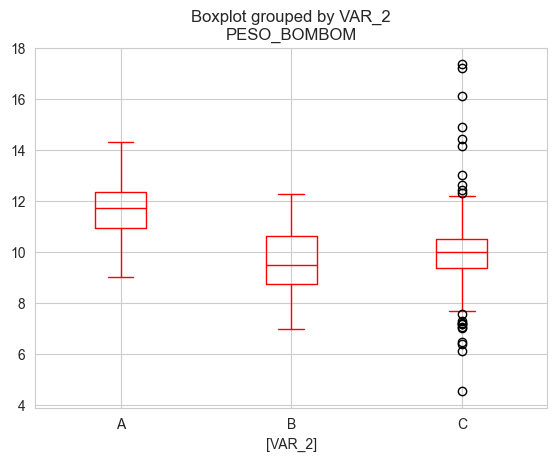

In [32]:
sub1 = dataframe1[['VAR_2', 'PESO_BOMBOM']].dropna()
boxplot1 = sub1.boxplot(by='VAR_2',color='red')
plt.show(boxplot1)

----

Visualizando outliers do Boxplot.

In [33]:
Q1 = np.percentile(sub1[sub1['VAR_2']=='C']['PESO_BOMBOM'], 25)
Q3 = np.percentile(sub1[sub1['VAR_2']=='C']['PESO_BOMBOM'], 75)
IQR = Q3 - Q1

limite_inferior = Q1 -1.5 *IQR
limite_superior = Q3 +1.5 *IQR



sub1[(sub1['VAR_2']=='C')&(sub1['PESO_BOMBOM']<limite_inferior)]


,VAR_2,PESO_BOMBOM
93,C,7.578168
147,C,7.310112
178,C,4.543124
222,C,7.029721
223,C,6.397409
232,C,6.470697
328,C,7.219837
334,C,7.178405
345,C,7.180144
396,C,7.062792


Analise Descritiva


* A mediana dos atributos 'A' da 'VAR_2' acabam ficando acima do valor de 10 g.
* A mediana dos atributos 'B' da 'VAR_2' acabam ficando em um ponto muito bom (entre 9.0 e 10.5) mas temos que lembrar que de 9.0 até 9.90 é considerado recusado pelo CQ
* A mediana dos atributos 'C' da 'VAR_2'acabam ficando em um ponto muito bom (entre 9.0 e 10.5) Investiguei se essa variável 'VAR_2'poderia estar sendo influenciada por outro grupo, como por exemplo:  a 'VAR_1'mas não existe correlação entre elas.

Visualmente temos diferenciação entre as médias.


* Observando a variável 'VAR_2', os atributos que mais se aproximam do peso ideal são 'B' e 'C'. Mas como 'C' temos muitos outliers. O que mais se destacara é o atributo 'B'.


-------

Aplicando Teste de Kruskal Willis


In [34]:
x = dataframe1[dataframe1['VAR_2']=='A']['PESO_BOMBOM']
y = dataframe1[dataframe1['VAR_2']=='B']['PESO_BOMBOM']
z = dataframe1[dataframe1['VAR_2']=='C']['PESO_BOMBOM']
kruskal(x,y,z)

KruskalResult(statistic=196.8472637857053, pvalue=1.7995328544091014e-43)

In [35]:
estatistico, valorP = kruskal(x,y,z)

if valorP < 0.05:
    print('Rejeitando a hipótese nula - > há diferença estatisticamente significativa entre as variaveis')
else:
    print('Não rejeitando a hipótese nula - > Não há evidências suficientes para concluirmos que há diferença estatisticamente significativa entre as variaveis')



Rejeitando a hipótese nula - > há diferença estatisticamente significativa entre as variaveis


Temos a confirmação estatistica que há diferença estatisticamente significativa entre as variaveis

In [36]:
print('média das amotras')
m2 = sub1.groupby('VAR_2').mean()
print(m2)

média das amotras
       PESO_BOMBOM
VAR_2             
A        11.659115
B         9.595768
C        10.011633


In [37]:
print('desvio padrão')
m3 = sub1.groupby('VAR_2').std()
print(m3)

desvio padrão
       PESO_BOMBOM
VAR_2             
A         0.981347
B         1.153189
C         1.651963


Como rejeitamos a hipotese nula, precisamos do test post-hoc para saber qual a diferenciação que ocorre

Teste post-hoc dunn


In [38]:
resultado_posthoc = sp.posthoc_dunn(sub1, val_col='PESO_BOMBOM', group_col='VAR_2', p_adjust='bonferroni')
results = (resultado_posthoc)
print(resultado_posthoc)

              A             B             C
A  1.000000e+00  8.844730e-39  4.505855e-28
B  8.844730e-39  1.000000e+00  6.907347e-02
C  4.505855e-28  6.907347e-02  1.000000e+00


<Axes: >

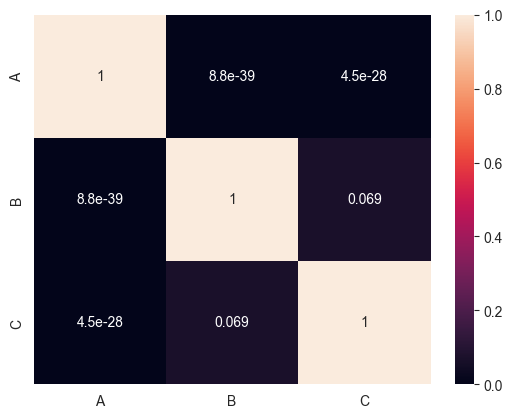

In [39]:
sns.heatmap(resultado_posthoc,annot=True)

Analise diagnostica


Após a afirmativa de rejeitarmos a hipotese nula, entre as variaveis  'VAR_2' e 'PESO_BOMBOM'.




* O problema de negócio pode estar na variação da escolha em utilizar as opções de ‘VAR_2’. 
Visualmente através do gráfico e através do test post-hoc conseguimos observar diferenciação entre os atributos. 

* Ambas variáveis não são controláveis. Mas no final deste primeiro levantamento pode ficar bem claro os padrões e correlações existentes. Com essas informações sendo comprovadas através de testes estatísticos,  temos um ponto de partida para melhorar a precisão do resultado final. 

* Uma recomendação que gostaria de sugerir, é a opção de se trabalhar em cima de uma formulação(algo que é pré-definido antes por vários setores que deixa pré demarcado qual a melhor combinação.)





------

---

Analisando 'VAR_2'comparando com 'QTD_CHOC'

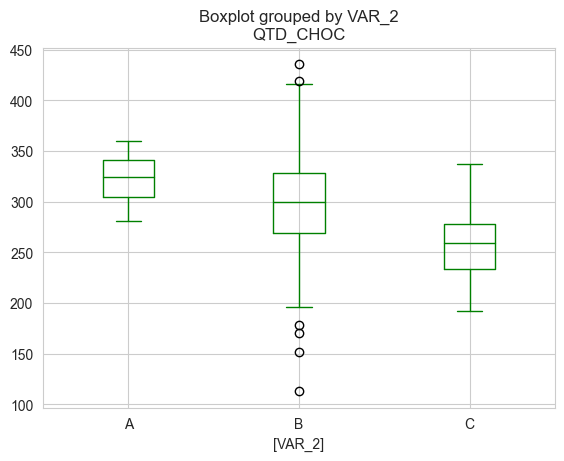

In [40]:
sub5= dataframe1[['VAR_2', 'QTD_CHOC']].dropna()
boxplot3 = sub5.boxplot(by='VAR_2',color='green')
plt.show(boxplot3)

Visualizando Outliers do boxplot

In [41]:
Q2 = np.percentile(sub5[sub5['VAR_2']=='B']['QTD_CHOC'],25)
Q6 = np.percentile(sub5[sub5['VAR_2']=='B']['QTD_CHOC'],75)
ICR = Q6 - Q2

limite_inferior = Q2 -1.5 *ICR
limite_superior = Q6 +1.5 *ICR

sub1[(sub1['VAR_2']=='B')&(sub1['PESO_BOMBOM']<limite_inferior)]

,VAR_2,PESO_BOMBOM
6,B,8.722600
11,B,9.963041
17,B,10.526480
18,B,10.767788
22,B,9.955810
...,...,...
484,B,10.379911
485,B,9.873261
490,B,9.494521
491,B,9.305761


Analise Descritiva 



Visualmente temos diferenciação entre as médias.

* Observando a variavel 'VAR_2', os atributos que mais se aproximam um do outro são os de 'A' com 'B'. Os atributos de 'A' com 'C' e 'B' com 'C' tem as medianas bem distantes. 

* Observando o grupo 'B' de 'VAR_2' temos dados que fogem do padrão.



Aplicando Teste de Kruskal Willis

In [42]:
p = dataframe1[dataframe1['VAR_2']=='A']['QTD_CHOC']
q = dataframe1[dataframe1['VAR_2']=='B']['QTD_CHOC']
r = dataframe1[dataframe1['VAR_2']=='C']['QTD_CHOC']
kruskal(p,q,r)

KruskalResult(statistic=206.91968466530528, pvalue=1.1693953871002868e-45)

In [43]:
statistico, valorP = kruskal(p,q,r)

if valorP < 0.05:
    print('Rejeitando a hipótese nula - > há diferença estatisticamente significativa entre as variaveis')
else:
    print('Não rejeitando a hipótese nula - > Não há evidências suficientes para concluirmos que há diferença estatisticamente significativa entre as variaveis')



Rejeitando a hipótese nula - > há diferença estatisticamente significativa entre as variaveis


Temos a confirmação estatistica que há diferença estatisticamente significativa entre as variaveis

In [44]:
m4 = sub5.groupby('VAR_2').mean()
print('media das amostras{}'.format(m4))

media das amostras         QTD_CHOC
VAR_2            
A      323.223608
B      296.256485
C      258.082768


In [45]:
m5 = sub5.groupby('VAR_2').std()
print('desvio padrao das amostras{}'.format(m5))

desvio padrao das amostras        QTD_CHOC
VAR_2           
A      21.682587
B      50.153128
C      31.260362


Como rejeitamos a hipotese nula, precisamos do test post-hoc para saber qual a diferenciação que ocorre entre os grupos.

Teste post Hoc dunn

In [46]:
resultado_posthocc = sp.posthoc_dunn(sub5, val_col='QTD_CHOC', group_col='VAR_2', p_adjust='bonferroni')
results = (resultado_posthocc)
print(resultado_posthocc)

              A             B             C
A  1.000000e+00  6.391283e-09  7.981680e-46
B  6.391283e-09  1.000000e+00  3.384062e-16
C  7.981680e-46  3.384062e-16  1.000000e+00


<Axes: >

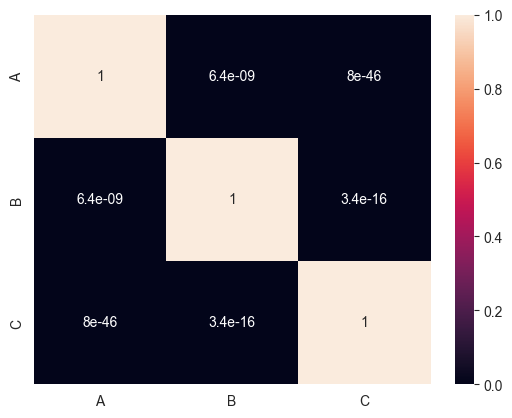

In [47]:
sns.heatmap(resultado_posthocc,annot=True)

Analise diagnostica


Após a afirmativa de rejeitarmos a hipotese nula, entre as variaveis  'VAR_2' e 'QTD_CHOC'.



* O teste Post-hoc nos Confirma de forma estatistica, que os atributos que mais se aproximam  um do outro são os de 'A' com 'B'. Os atributos de 'A' com 'C' e 'B' com 'C' tem as medias bem distantes. 

* Como não há um alvo para trabalharmos em cima ja que a 'QTD_CHOC' pode ser controlada, não conseguimos ter convicçao qual a melhor escolha. O que podemos levar como verdade é que uma delas comparando as outras, possui outliers e todas elas estão bem divergentes. 




----

-------

Analisando 'QTD_CHOC'comparando com 'PESO_BOMBOM'

Analise descritiva

Atraves deste grafico conseguimos visualizar que relacionando a variavel 'QTD_CHOC' e 'PESO_BOMBOM', conseguimos ver um foco na região de 250 a 350. Segue a metrica que o gerente da empresa compartilhou, a medida que se aproxima de 9.90 (PESO_BOMBOM) o custo aumenta, consequentemente aumentando a quantidade de chocolate, como mostra o grafico.

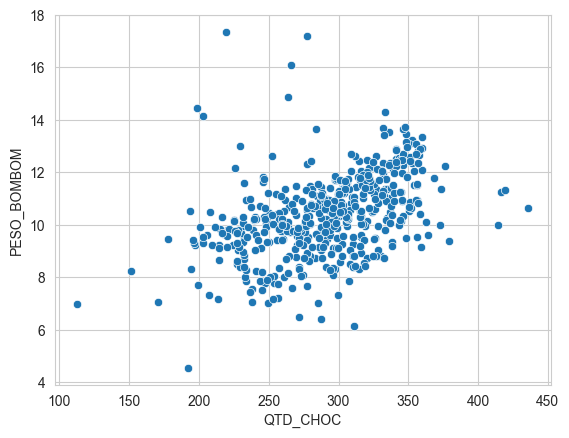

In [48]:
graf4 = sns.scatterplot(dataframe1, x= 'QTD_CHOC', y='PESO_BOMBOM')
plt.show(graf4)

Conforme 'PESO_BOMBOM'aumenta, o foco aumenta e a coloração mais forte.

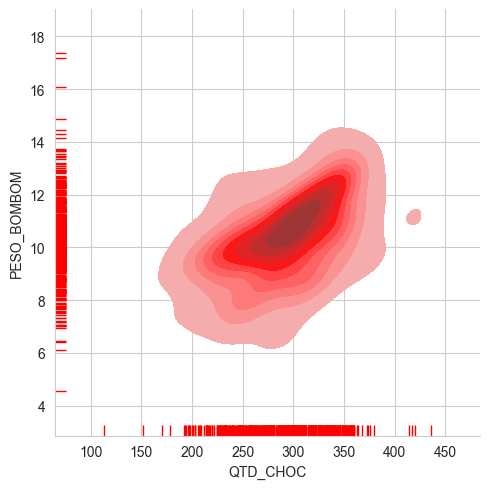

In [49]:
tapete_fig = sns.displot(dataframe1, x='QTD_CHOC',y='PESO_BOMBOM',kind='kde',rug=True,fill=True,color='red')

Aplicando teste de regressão linear simples


In [50]:
X = dataframe1['QTD_CHOC'].values
Y = dataframe1['PESO_BOMBOM'].values
coef_angular, coef_linear,_,_,desvio_erro= linregress(X,Y)

In [51]:
print('coeficiente angular = {:0.2f}'.format(coef_angular))

coeficiente angular = 0.02


In [52]:
print('coeficiente lienar = {:0.2f}'.format(coef_linear))

coeficiente lienar = 5.96


In [53]:
print('desvio padrão = {:0.2f}'.format(desvio_erro))

desvio padrão = 0.00


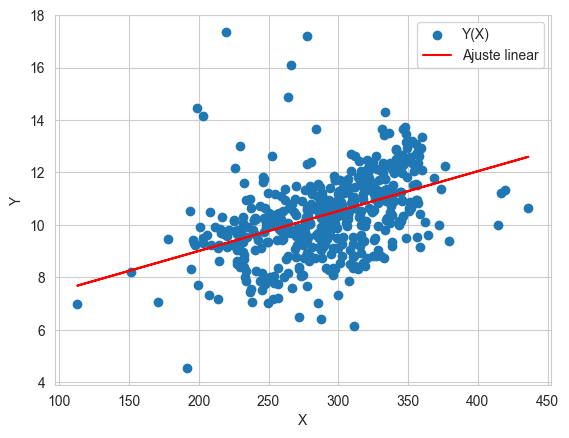

In [54]:
reta = coef_angular*X+coef_linear
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label= 'Ajuste linear', color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

Analise diagnostica 


* Nossa tese inicial que a medida em que é adicionado 'quantidade de chocolate' o peso do bombom vai subindo, se confirma graficamente e através do teste de correlação.

* Temos uma correlação mediana positiva entre as variáveis, no ponto em que ela se aproxima do valor de 250/300 fica ideal para o peso do bombom de 10.

* O problema de negócio pode estar na falta de padrão ao dosar a quantidade de chocolate. 

* Recomendo começar a trabalhar em cima da margem que definimos como maior potencial ( 250 a 300 - quantidade de chocolate), Seguindo essa linha mais definida e olhando para o conjuntos de dados atual, se for aplicado essa dosagem de forma mais precisa, podemos começar a ver resultado esperados pela indústria.




METRICAS DE ERRO ABSOLUTO MEDIO E ERRO QUADRATICO MEDIO.


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


media_erro_absolutoo = mean_absolute_error(Y,reta)
media_erro_quadraticoo = mean_squared_error(Y,reta)


print('Media de erro absoluto - > {:0.2f}'.format(media_erro_absolutoo))
print('Media erro quadratico - > {:0.2f}'.format(media_erro_quadraticoo))









Media de erro absoluto - > 1.04
Media erro quadratico - > 2.00


Aplicando teste -  Correlação de Pearson

In [56]:
sub7= dataframe1[['QTD_CHOC', 'PESO_BOMBOM']].dropna()
sub7.corr()

,QTD_CHOC,PESO_BOMBOM
QTD_CHOC,1.000000,0.437217
PESO_BOMBOM,0.437217,1.000000


Numeros positivos - isso indica uma coorrelação.


Temos uma correlação(associação) com força mediana entre as variaveis, 



<Axes: >

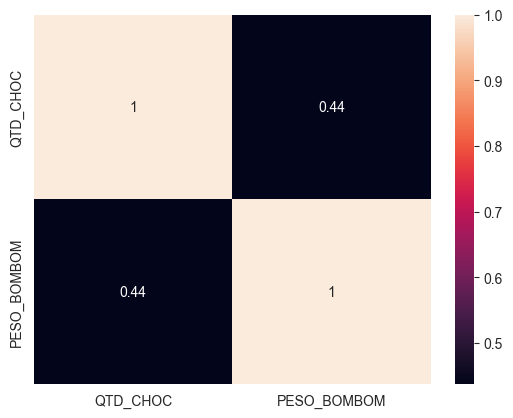

In [57]:
sns.heatmap(sub7.corr(), annot=True)

-----

------

Analise Preditiva

Importando modelos e métricas.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder


preditores = dataframe1.drop(['PESO_BOMBOM'],axis=1)
alvo = dataframe1['PESO_BOMBOM']
X_train, X_test, Y_train, Y_test = train_test_split(preditores, alvo, test_size= 0.25, random_state=10)




pipeline_linear_rg = Pipeline([
    ('ct',ColumnTransformer(transformers=[('min_max_scaler', MinMaxScaler(),['VAR_1','QTD_CHOC']),('one_hot_enc',OneHotEncoder(handle_unknown='ignore'),['VAR_2'])],remainder='passthrough')),
    ('model', LinearRegression())
])

pipeline_linear_ad = Pipeline([
    ('ct',ColumnTransformer(transformers=[('min_max_scaler', MinMaxScaler(),['VAR_1','QTD_CHOC']),('one_hot_enc',OneHotEncoder(handle_unknown='ignore'),['VAR_2'])],remainder='passthrough')),
    ('model',DecisionTreeRegressor())
])

pipeline_linear_kn = Pipeline([
    ('ct',ColumnTransformer(transformers=[('min_max_scaler', MinMaxScaler(),['VAR_1','QTD_CHOC']),('one_hot_enc',OneHotEncoder(handle_unknown='ignore'),['VAR_2'])],remainder='passthrough')),
    ('model',KNeighborsRegressor())
])

-----


In [59]:
pipeline_linear_rg.fit(X_train,Y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['VAR_1', 'QTD_CHOC']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VAR_2'])])),
                ('model', LinearRegression())])

In [60]:
y_predict = pipeline_linear_rg.predict(X_test)
valor_final =pipeline_linear_rg.score(X_test,Y_test)

In [61]:
print('ele explica: {:0.2f}'.format(valor_final))

ele explica: 0.61


In [62]:
media_erro_absoluto = mean_absolute_error(Y_test,y_predict)
media_erro_quadratico = mean_squared_error(Y_test,y_predict)

print('Media de erro absoluto - > {:0.2f}'.format(media_erro_absoluto))
print('Media erro quadratico - > {:0.2f}'.format(media_erro_quadratico))

Media de erro absoluto - > 0.64
Media erro quadratico - > 0.80


------------


In [63]:
pipeline_linear_ad.fit(X_train,Y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['VAR_1', 'QTD_CHOC']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VAR_2'])])),
                ('model', DecisionTreeRegressor())])

In [64]:
y_predict2 = pipeline_linear_ad.predict(X_test)
valor_final2 =pipeline_linear_ad.score(X_test,Y_test)


In [65]:
print('ele explica : {:0.2f}'.format(valor_final2))

ele explica : 0.42


In [66]:
media_erro_absoluto2 = mean_absolute_error(Y_test,y_predict2)
media_erro_quadratico2 = mean_squared_error(Y_test,y_predict2)

print('Media de erro absoluto - > {:0.2f}'.format(media_erro_absoluto2))
print('Media erro quadratico - > {:0.2f}'.format(media_erro_quadratico2))

Media de erro absoluto - > 0.63
Media erro quadratico - > 1.18


-------

In [67]:
pipeline_linear_kn.fit(X_train,Y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['VAR_1', 'QTD_CHOC']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VAR_2'])])),
                ('model', KNeighborsRegressor())])

In [68]:
y_predict3 = pipeline_linear_kn.predict(X_test)
valor_final3 =pipeline_linear_kn.score(X_test,Y_test)


In [69]:
print('ele explica : {:0.2f}'.format(valor_final3))

ele explica : 0.55


In [70]:
media_erro_absoluto3 = mean_absolute_error(Y_test,y_predict3)
media_erro_quadratico3 = mean_squared_error(Y_test,y_predict3)

print('Media de erro absoluto - > {:0.2f}'.format(media_erro_absoluto3))
print('Media erro quadratico - > {:0.2f}'.format(media_erro_quadratico3))

Media de erro absoluto - > 0.53
Media erro quadratico - > 0.92


----------